In [1]:
import pandas as pd
import numpy as np

In [2]:
# CLEAN THE DATA - MICROSOFT MAKING NEW MOVIE, WHAT TYPE OF MOVIE ARE THEY LOOKING FOR? 
    # RECENCY - Last 10 years of data, production cost of > $1,000,000
    # AUDIENCE - Genres to Foreign gross income
    # BUDGET Genres to budget

In [3]:
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', delimiter = ',')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
# Drop '$' from each of the columns with monetary value
df['worldwide_gross'] = df['worldwide_gross'].str[1:]
df['production_budget'] = df['production_budget'].str[1:]
df['domestic_gross'] = df['domestic_gross'].str[1:]

In [5]:
# Next, drop ',' from each of the columns of the money columns in order to convert them into an integer for manipulation
# Convert to float first as errors were flagged
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(float)
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(float)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').astype(float)

In [6]:
# Now turn floats into int64
df['worldwide_gross'] = df['worldwide_gross'].astype(np.int64)
df['production_budget'] = df['production_budget'].astype(np.int64)
df['domestic_gross'] = df['domestic_gross'].astype(np.int64)

In [8]:
# New dataframe to work with, one with only the necessary columns
df_dates_gross = df[['release_date', 'production_budget','worldwide_gross']]
df_dates_gross

,release_date,production_budget,worldwide_gross
0,"Dec 18, 2009",425000000,2776345279
1,"May 20, 2011",410600000,1045663875
2,"Jun 7, 2019",350000000,149762350
3,"May 1, 2015",330600000,1403013963
4,"Dec 15, 2017",317000000,1316721747
...,...,...,...
5777,"Dec 31, 2018",7000,0
5778,"Apr 2, 1999",6000,240495
5779,"Jul 13, 2005",5000,1338
5780,"Sep 29, 2015",1400,0


In [9]:
# New column 'Year' to find out what the budget of movies over the years have looks like.

df_dates_gross['year'] = df_dates_gross['release_date'].str[-4:]


<ipython-input-9-c03dcef09843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates_gross['year'] = df_dates_gross['release_date'].str[-4:]


In [10]:
# New column 'Month' to find out what time of year movies are released.

df_dates_gross['month'] = df_dates_gross['release_date'].str[:3]
df_dates_gross_year = df_dates_gross

<ipython-input-10-13fb7a7d8525>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates_gross['month'] = df_dates_gross['release_date'].str[:3]


In [11]:
# Change year to int datatype in order to manipulate

df_dates_gross_year['year'] = pd.to_numeric(df_dates_gross_year['year'])

<ipython-input-11-fc9c3b049598>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates_gross_year['year'] = pd.to_numeric(df_dates_gross_year['year'])


In [12]:
df_dates_gross_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   worldwide_gross    5782 non-null   int64 
 3   year               5782 non-null   int64 
 4   month              5782 non-null   object
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [25]:
# Filters the dataset so that only moveis released past the year 2000 get returned
df_dates_gross_year = df_dates_gross_year[df_dates_gross_year['year'] > 2000]
df_dates_gross_year = df_dates_gross_year[df_dates_gross_year['production_budget'] > 1000000]

In [27]:
# We dropped 200~ rows from the dataset

df_dates_gross_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3762 entries, 0 to 5208
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       3762 non-null   object
 1   production_budget  3762 non-null   int64 
 2   worldwide_gross    3762 non-null   int64 
 3   year               3762 non-null   int64 
 4   month              3762 non-null   object
dtypes: int64(3), object(2)
memory usage: 176.3+ KB


In [28]:
df_dates_gross_year.head()

,release_date,production_budget,worldwide_gross,year,month
0,"Dec 18, 2009",425000000,2776345279,2009,Dec
1,"May 20, 2011",410600000,1045663875,2011,May
2,"Jun 7, 2019",350000000,149762350,2019,Jun
3,"May 1, 2015",330600000,1403013963,2015,May
4,"Dec 15, 2017",317000000,1316721747,2017,Dec


In [29]:
# Divide dataset by year then add up releases per month
df_complete = df_dates_gross_year[['production_budget','worldwide_gross', 'year', 'month']]
df_complete.sort_values(by = 'year')

,production_budget,worldwide_gross,year,month
352,105000000,10364769,2001,Apr
3435,12000000,450594,2001,Jul
1976,30000000,17865209,2001,Jan
4296,5000000,16017403,2001,Aug
4276,5000000,39723096,2001,Mar
...,...,...,...,...
1208,49800000,0,2019,Sep
2487,20000000,254210310,2019,Mar
535,82000000,0,2020,Feb
194,150000000,0,2020,Dec


In [42]:
df_new = df_complete
df_new

,production_budget,worldwide_gross,year,month
0,425000000,2776345279,2009,Dec
1,410600000,1045663875,2011,May
2,350000000,149762350,2019,Jun
3,330600000,1403013963,2015,May
4,317000000,1316721747,2017,Dec
...,...,...,...,...
5204,1100000,0,2010,Mar
5205,1100000,0,2015,Apr
5206,1100000,0,2010,Dec
5207,1100000,0,2013,Dec


In [43]:
# Order month by order in the calender

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_new['month'] = pd.Categorical(df_new['month'], categories=months, ordered=True)
df_new = df_new['month'].sort_values()
df_new = list(df_new)

<ipython-input-43-4083bf8c703f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = pd.Categorical(df_new['month'], categories=months, ordered=True)


In [32]:
# Initialize new dataframe that reads frequency of number of months

column_names = months

a = np.zeros(shape=(1,12), dtype = int)
testdf = pd.DataFrame(a, columns = column_names)

for x in df_new:
    if x in column_names:
        testdf[x] += 1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Retrieve data in calender order, copy and paste values to y-axis below

list(testdf.value_counts().index)

[(225, 280, 324, 315, 258, 287, 269, 312, 346, 369, 321, 456)]

In [47]:
from matplotlib import pyplot as plt
%matplotlib inline

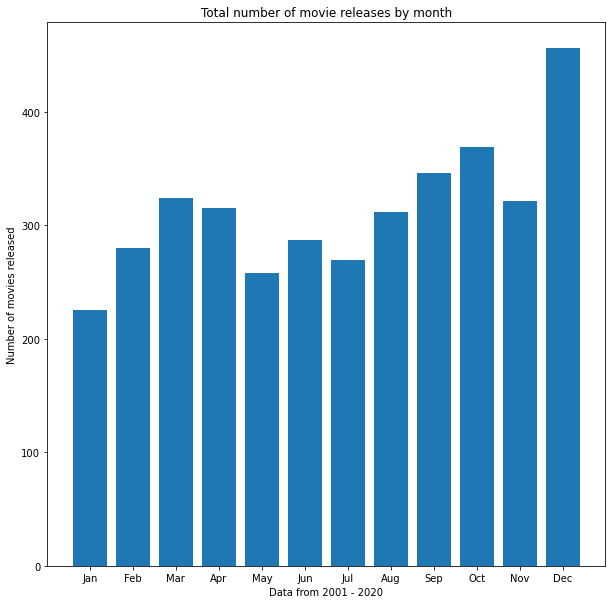

In [48]:
fig, ax = plt.subplots(figsize = (10, 10))
x = months
y = [225, 280, 324, 315, 258, 287, 269, 312, 346, 369, 321, 456]
ax.bar(x, y);
ax.set_title('Total number of movie releases by month')
ax.set_xlabel('Data from 2001 - 2020')
ax.set_ylabel('Number of movies released');